<a href="https://colab.research.google.com/github/mateosuster/nlpPapers/blob/main/05_LDA_TopicModels_GENSIM_Coherence_Analisis_data_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencias

In [ ]:
%%capture
!pip install pyLDAvis==2.1.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from collections import Counter
import numpy as np
from nltk import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
from gensim import corpora

import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import os, re, operator, warnings
warnings.filterwarnings('ignore')  
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


# Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mateosuster/nlpPapers/main/code/data/ACL_data.csv")
data.head()
#data.tail()

,YEAR,TITLE,ABSTRACT,AUTHOR,PUBLISHER,BOOKTITLE,CATEGORY
0,2022,A Systematic Survey of Text Worlds as Embodied...,Text Worlds are virtual environments for embod...,"Jansen, Peter",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
1,2022,A Minimal Computational Improviser Based on Or...,A prototype system for playing a minimal impro...,"Montfort, Nick and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
2,2022,Craft an Iron Sword: Dynamically Generating In...,Non-Player Characters (NPCs) significantly enh...,"Volum, Ryan and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
3,2022,A Sequence Modelling Approach to Question Answ...,Interactive Question Answering (IQA) requires ...,"Furman, Gregory and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS
4,2022,Automatic Exploration of Textual Environments ...,The purpose of this extended abstract is to di...,"Teodorescu, Laetitia and",Association for Computational Linguistics,Proceedings of the 3rd Wordplay: When Language...,INPROCEEDINGS


In [ ]:
#from sklearn.datasets import fetch_20newsgroups
#dataset = fetch_20newsgroups(shuffle=True, random_state=1,remove=('headers', 'footers', 'quotes')).data
dataset = data.ABSTRACT
#type(dataset)
dataset = dataset.tolist()
dataset[3]

'Interactive Question Answering (IQA) requires an intelligent agent to interact with a dynamic environment in order to gather information necessary to answer a question. IQA tasks have been proposed as means of training systems to develop language or visual comprehension abilities. To this end, the Question Answering with Interactive Text (QAit) task was created to produce and benchmark interactive agents capable of seeking information and answering questions in unseen environments. While prior work has exclusively focused on IQA as a reinforcement learning problem, such methods suffer from low sample efficiency and poor accuracy in zero-shot evaluation. In this paper, we propose the use of the recently proposed Decision Transformer architecture to provide improvements upon prior baselines. By utilising a causally masked GPT-2 Transformer for command generation and a BERT model for question answer prediction, we show that the Decision Transformer achieves performance greater than or eq

In [ ]:
type(dataset)
#fetch_20newsgroups

list

# Preproc

## Limpieza

In [ ]:
STOP_WORDS = stopwords.words("english")

def tokenize(x):
    return [word for word in word_tokenize(x) if word not in STOP_WORDS and word.isalpha() and len(word)>1]
    
texts= [tokenize(str(doc).lower()) for doc in dataset]


In [ ]:
print(texts[100])

['introduce', 'natural', 'logic', 'framework', 'based', 'reinforcement', 'learning', 'introspective', 'revision', 'model', 'samples', 'rewards', 'specific', 'reasoning', 'paths', 'policy', 'gradient', 'introspective', 'revision', 'algorithm', 'modifies', 'intermediate', 'symbolic', 'reasoning', 'steps', 'discover', 'operations', 'well', 'leverages', 'external', 'knowledge', 'alleviate', 'spurious', 'reasoning', 'training', 'inefficiency', 'framework', 'supported', 'properly', 'designed', 'local', 'relation', 'models', 'avoid', 'input', 'entangling', 'helps', 'ensure', 'interpretability', 'proof', 'paths', 'proposed', 'model', 'interpretability', 'shows', 'superior', 'capability', 'monotonicity', 'inference', 'systematic', 'generalization', 'interpretability', 'compared', 'previous', 'models', 'existing', 'datasets']


## Ajustes para LDA

In [ ]:
### dictionary:
dictionary = corpora.Dictionary(texts)  #crea diccionario asinandole un indice numerico a cada palabra
print(len(dictionary))
dictionary.filter_extremes(no_below=10, no_above=0.5)  #filtra tokens q aparencen en menos de 10 documentos y en mas de la mitad de los documentos.
print(len(dictionary))

48159
10142


In [ ]:
### doc2bow:
#bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
corpus = [dictionary.doc2bow(text) for text in texts] #el bow cuenta cantidad de apariciones de cada palabra del diccionario
len(corpus) 

33811

In [ ]:
### TF-IDF:
from gensim import corpora, models

#tfidf = models.TfidfModel(bow_corpus)
tfidf = models.TfidfModel(corpus)

#corpus_tfidf = tfidf[bow_corpus]
corpus_tfidf = tfidf[corpus]

#from pprint import pprint
#for text in corpus_tfidf:
 #   pprint(text)
  #  break
len(corpus_tfidf)

33811

## LDA

In [ ]:
n_topics = 10

In [ ]:
semilla = 420

In [ ]:
lsamodel = LsiModel(corpus=corpus, num_topics=n_topics, id2word=dictionary  #25
                    # , random_seed = semilla
                    )

In [ ]:
lsamodel.print_topics(n_topics,8)


[(0,
  '0.296*"model" + 0.284*"language" + 0.261*"models" + 0.226*"data" + 0.181*"task" + 0.154*"paper" + 0.135*"results" + 0.134*"translation"'),
 (1,
  '-0.681*"de" + -0.280*"la" + -0.280*"des" + -0.244*"les" + -0.209*"et" + -0.172*"le" + -0.169*"un" + -0.160*"une"'),
 (2,
  '-0.457*"translation" + 0.457*"model" + -0.333*"language" + 0.263*"models" + -0.181*"system" + -0.178*"machine" + -0.168*"languages" + -0.161*"data"'),
 (3,
  '0.700*"language" + -0.436*"translation" + 0.201*"models" + -0.194*"system" + -0.166*"machine" + 0.132*"languages" + 0.127*"natural" + -0.127*"task"'),
 (4,
  '0.470*"translation" + 0.410*"model" + 0.304*"models" + 0.248*"language" + -0.192*"corpus" + -0.177*"data" + 0.164*"machine" + -0.155*"text"'),
 (5,
  '-0.800*"data" + 0.264*"word" + -0.239*"training" + 0.156*"language" + 0.139*"information" + 0.131*"words" + -0.128*"models" + 0.109*"semantic"'),
 (6,
  '-0.578*"word" + 0.358*"task" + -0.258*"embeddings" + 0.250*"system" + -0.226*"data" + -0.208*"word

In [ ]:
ldamodel = LdaModel(corpus=corpus, num_topics=n_topics, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                    )
# LDA hecho con el doc2bow (bolsa de palabras comun)  (NO con TF-IDF)

In [ ]:
ldamodel.print_topics(10, 8)

[(0,
  '0.085*"translation" + 0.037*"machine" + 0.025*"mt" + 0.023*"system" + 0.016*"systems" + 0.015*"language" + 0.015*"parallel" + 0.013*"quality"'),
 (1,
  '0.028*"models" + 0.023*"model" + 0.022*"data" + 0.019*"language" + 0.018*"training" + 0.015*"performance" + 0.014*"learning" + 0.012*"tasks"'),
 (2,
  '0.035*"task" + 0.033*"system" + 0.017*"paper" + 0.014*"model" + 0.013*"results" + 0.012*"features" + 0.011*"using" + 0.010*"shared"'),
 (3,
  '0.020*"corpus" + 0.018*"language" + 0.012*"paper" + 0.012*"data" + 0.011*"annotation" + 0.009*"resources" + 0.008*"present" + 0.007*"languages"'),
 (4,
  '0.032*"parsing" + 0.028*"syntactic" + 0.023*"semantic" + 0.023*"dependency" + 0.019*"structure" + 0.019*"grammar" + 0.018*"parser" + 0.017*"discourse"'),
 (5,
  '0.024*"model" + 0.015*"information" + 0.014*"knowledge" + 0.012*"propose" + 0.010*"text" + 0.009*"question" + 0.009*"task" + 0.008*"approach"'),
 (6,
  '0.018*"human" + 0.017*"evaluation" + 0.016*"systems" + 0.015*"dialogue" + 

In [ ]:
#### LDA MODEL USANDO TF-IDF COMO INPUT (EN VEZ DE UNA BOLSA DE PALABRAS bow2word):

# Running LDA using TF-IDF (from Susan Li: https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24):

lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=n_topics, id2word=dictionary, passes=10, workers=4)
#for idx, topic in lda_model_tfidf.print_topics(-1):
 #   print('Topic: {} Word: {}'.format(idx, topic))

##NO FUNCIONA DE ESTA MANERA SIMIL PROFES, DA UNA COHERENCIA NEGATIVA!!!!
#lda_model_tfidf = LdaModel(corpus=corpus_tfidf, num_topics=10, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
#                    )



In [ ]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(tokenize(new_text.lower()))
lda_vector = ldamodel[bow_vector]
print(lda_vector)
# print the document's single most prominent LDA topic
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(3, 0.47890756), (4, 0.024004132), (7, 0.39605656), (8, 0.01757542), (9, 0.07660518)]
0.014*"language" + 0.013*"corpus" + 0.010*"data" + 0.009*"paper" + 0.007*"research" + 0.007*"system" + 0.007*"annotation" + 0.006*"evaluation" + 0.006*"text" + 0.006*"present"


In [ ]:
new_text = dataset[0]

# transform held_out_text into the bag-of-words space
bow_vector = dictionary.doc2bow(tokenize(new_text.lower()))
lda_vector = ldamodel[bow_vector]
print(lda_vector)
# print the document's single most prominent LDA topic
print(ldamodel.print_topic(max(lda_vector, key=lambda item: item[1])[0]))

[(3, 0.47890756), (4, 0.024004132), (7, 0.39605656), (8, 0.01757542), (9, 0.07660518)]
0.014*"language" + 0.013*"corpus" + 0.010*"data" + 0.009*"paper" + 0.007*"research" + 0.007*"system" + 0.007*"annotation" + 0.006*"evaluation" + 0.006*"text" + 0.006*"present"


topicos de sklearn


1 embedings
6 sequence 2 sequence
3 herramientas - implementacion
7 palabras en otro idioma? articulos? parte de nombres?
9 emotions analysis (hater etc)
5 computation and social sceince,

promediar la distribucion para todos los años y ver como se distribuyo para cada año y decir este año el topico no fue tan frecuente

In [ ]:
lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(n_topics,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(n_topics,formatted=False)]

In [ ]:
ldatopics[0]

['word',
 'languages',
 'words',
 'language',
 'paper',
 'lexical',
 'semantic',
 'english',
 'embeddings',
 'using']

In [ ]:
lda_tf_idf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(n_topics,formatted=False)]

In [ ]:
lda_tf_idf_topics[0]

['model',
 'models',
 'word',
 'data',
 'training',
 'tasks',
 'neural',
 'method',
 'performance',
 'learning']

In [ ]:
#window_size=30,coherence='c_npmi',topn=5
lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=10,coherence='c_npmi',topn=20).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=10,coherence='c_npmi',topn=20).get_coherence_per_topic()

In [ ]:
lda_tf_idf_coherence = CoherenceModel(topics=lda_tf_idf_topics, texts=texts, dictionary=dictionary, window_size=10,coherence='c_npmi',topn=20).get_coherence_per_topic()

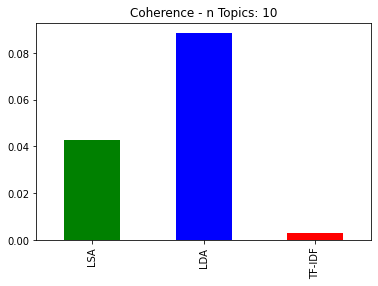

In [ ]:
df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()

df_tf_idf = pd.DataFrame([range(10),lda_tf_idf_coherence,lda_tf_idf_topics],index=['topic_id','coherence','topic']).transpose()

#pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence)}).plot.bar();
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence),'TF-IDF':np.mean(lda_tf_idf_coherence)}).plot.bar(title="Coherence - n Topics: 10", color=["green","blue","red"]);

In [ ]:
### LDA TOPICS:
# GRAFICO LDA doc2bow:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.114723  0.066285       1        1  18.709591
3     -0.057901  0.015574       2        1  16.461238
5     -0.084476  0.011522       3        1  15.058504
7     -0.065432 -0.114697       4        1   9.367049
2     -0.081871  0.108117       5        1   8.680721
6     -0.078677  0.040548       6        1   8.435427
8     -0.037388  0.045651       7        1   7.669477
9      0.512847  0.094486       8        1   6.384579
0     -0.065638  0.094588       9        1   5.588955
4      0.073258 -0.362073      10        1   3.644461, topic_info=                Term          Freq         Total Category  logprob  loglift
1518     translation  12278.000000  12278.000000  Default  30.0000  30.0000
4831              de  12689.000000  12689.000000  Default  29.0000  29.0000
118           system  14346.000000  14346.000000  Default  28.0000  28.0000
122             word   9621.000000   9621.000000  Default  27.0000  27.0000
97             model  24209.000000  24209.000000  Default  26.0000  26.0000
...              ...           ...           ...      ...      ...      ...
1262       relations    792.646707   4345.091299  Topic10  -4.7751   1.6105
2211       algorithm    580.160391   2678.896517  Topic10  -5.0872   1.7821
1042        sentence    656.087949   5107.028283  Topic10  -4.9642   1.2599
1168      linguistic    618.922562   4450.811321  Topic10  -5.0225   1.3391
949   representation    589.966569   3652.401967  Topic10  -5.0704   1.4889

[686 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1184      3  0.997494  abstractive
176       1  0.467890     accuracy
176       2  0.034581     accuracy
176       3  0.057094     accuracy
176       4  0.022745     accuracy
...     ...       ...          ...
1402      5  0.023440      written
1402      7  0.151381      written
4552      4  0.997498          wsd
7876      2  0.997133          xml
3618      1  0.995635         zero

[1550 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 8, 3, 7, 9, 10, 1, 5])

In [ ]:
### LDA TF-IDF TOPICS:
# GRAFICO LA doc2bow:
pyLDAvis.gensim.prepare(lda_model_tfidf, corpus, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.124638 -0.053729       1        1  28.067269
6      0.128111 -0.077907       2        1  20.919367
2      0.113659 -0.051548       3        1  13.914208
0      0.092517  0.018377       4        1  11.747436
9      0.097095 -0.037308       5        1   9.301162
5      0.094718 -0.025000       6        1   6.481048
4     -0.418218 -0.163383       7        1   6.343442
3      0.036991  0.062364       8        1   2.690023
8     -0.128199  0.195145       9        1   0.329127
7     -0.141312  0.132989      10        1   0.206919, topic_info=                Term         Freq        Total Category  logprob  loglift
4831              de  7569.000000  7569.000000  Default  30.0000  30.0000
1518     translation  8031.000000  8031.000000  Default  29.0000  29.0000
6144             des  3335.000000  3335.000000  Default  28.0000  28.0000
4178              la  3297.000000  3297.000000  Default  27.0000  27.0000
6161             les  2837.000000  2837.000000  Default  26.0000  26.0000
...              ...          ...          ...      ...      ...      ...
2926     unification    49.269518   117.513570  Topic10  -4.6845   5.3114
6475            font    18.394490    39.702317  Topic10  -5.6698   5.4112
8361  spatiotemporal    15.851230    30.213272  Topic10  -5.8186   5.5356
7096  diacritization    16.586801    68.151759  Topic10  -5.7732   4.7675
1625        distress    15.072936    58.265216  Topic10  -5.8689   4.8285

[684 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
868       1  0.932134  absa
868       2  0.008436  absa
868       3  0.004218  absa
868       4  0.033742  absa
868       5  0.004218  absa
...     ...       ...   ...
3479      5  0.111314  year
3479      6  0.660208  year
3479      7  0.001919  year
3479      8  0.001919  year
3479      9  0.003838  year

[4925 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 1, 10, 6, 5, 4, 9, 8])

LSA Mean Coherence: 0.08 LSA
LDA Mean Coherence: 0.10 LDA
LDA Mean Coherence: 0.14 TF-IF


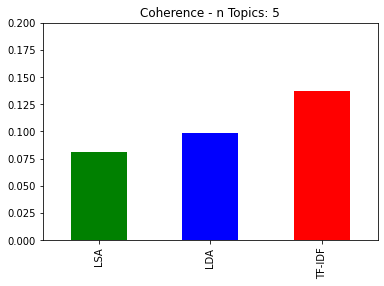

In [ ]:
#### ANALIZADOR DE CANTIDAD OPTIMA DE TOPICOS, POR COMPARACION DE COHERENCIA TOTAL Y PROMEDIO:
nro_topics = 5 # INGRESE NRO DE TOPICOS 
window_size_=10  # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=20  # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 

semilla = 420

lsamodel = LsiModel(corpus=corpus, num_topics=nro_topics, id2word=dictionary  #25
                    # , random_seed = semilla
                    )
ldamodel = LdaModel(corpus=corpus, num_topics=nro_topics, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                    )
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=nro_topics, id2word=dictionary, passes=10, workers=4)

lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(nro_topics,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(nro_topics,formatted=False)]
lda_tf_idf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(nro_topics,formatted=False)]

lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
lda_tf_idf_coherence = CoherenceModel(topics=lda_tf_idf_topics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()

df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
df_tf_idf = pd.DataFrame([range(10),lda_tf_idf_coherence,lda_tf_idf_topics],index=['topic_id','coherence','topic']).transpose()

title = "Coherence - n Topics: " + str(nro_topics)
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence),'TF-IDF':np.mean(lda_tf_idf_coherence)}).plot.bar(title=title, ylim=(0,0.20), color=["green","blue","red"]);
print('LSA Mean Coherence: %.2f LSA' % (np.mean(lsa_coherence)))
print('LDA Mean Coherence: %.2f LDA' % (np.mean(lda_coherence)))
print('LDA Mean Coherence: %.2f TF-IF' % (np.mean(lda_tf_idf_coherence)))

LSA Mean Coherence: 0.04 LSA
LDA Mean Coherence: 0.08 LDA
LDA Mean Coherence: -0.01 TF-IF


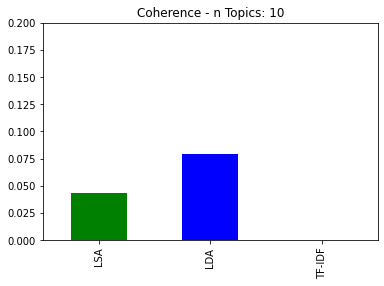

In [ ]:
#### ANALIZADOR DE CANTIDAD OPTIMA DE TOPICOS, POR COMPARACION DE COHERENCIAS PROMEDIO:
nro_topics = 10 # INGRESE NRO DE TOPICOS 
window_size_=10  # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=20  # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 

semilla = 420

lsamodel = LsiModel(corpus=corpus, num_topics=nro_topics, id2word=dictionary  #25
                    # , random_seed = semilla
                    )
ldamodel = LdaModel(corpus=corpus, num_topics=nro_topics, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                    )
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=nro_topics, id2word=dictionary, passes=10, workers=4)

lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(nro_topics,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(nro_topics,formatted=False)]
lda_tf_idf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(nro_topics,formatted=False)]

lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
lda_tf_idf_coherence = CoherenceModel(topics=lda_tf_idf_topics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()

df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
df_tf_idf = pd.DataFrame([range(10),lda_tf_idf_coherence,lda_tf_idf_topics],index=['topic_id','coherence','topic']).transpose()

title = "Coherence - n Topics: " + str(nro_topics)
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence),'TF-IDF':np.mean(lda_tf_idf_coherence)}).plot.bar(title=title, ylim=(0,0.20), color=["green","blue","red"]);
print('LSA Mean Coherence: %.2f LSA' % (np.mean(lsa_coherence)))
print('LDA Mean Coherence: %.2f LDA' % (np.mean(lda_coherence)))
print('LDA Mean Coherence: %.2f TF-IF' % (np.mean(lda_tf_idf_coherence)))

LSA Mean Coherence: -0.00 LSA
LDA Mean Coherence: 0.01 LDA
LDA Mean Coherence: -0.17 TF-IF


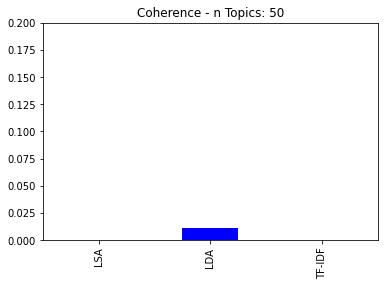

In [ ]:
#### ANALIZADOR DE CANTIDAD OPTIMA DE TOPICOS, POR COMPARACION DE COHERENCIAS PROMEDIO:
nro_topics = 50 # INGRESE NRO DE TOPICOS 
window_size_=10  # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=20  # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 

semilla = 420

lsamodel = LsiModel(corpus=corpus, num_topics=nro_topics, id2word=dictionary  #25
                    # , random_seed = semilla
                    )
ldamodel = LdaModel(corpus=corpus, num_topics=nro_topics, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                    )
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=nro_topics, id2word=dictionary, passes=10, workers=4)

lsatopics  = [[word for word, prob in topic] for topicid, topic in lsamodel.show_topics(nro_topics,formatted=False)]
ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(nro_topics,formatted=False)]
lda_tf_idf_topics = [[word for word, prob in topic] for topicid, topic in lda_model_tfidf.show_topics(nro_topics,formatted=False)]

lsa_coherence = CoherenceModel(topics=lsatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
lda_tf_idf_coherence = CoherenceModel(topics=lda_tf_idf_topics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()

df_lda = pd.DataFrame([range(10),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
df_lsa = pd.DataFrame([range(10),lsa_coherence,lsatopics],index=['topic_id','coherence','topic']).transpose()
df_tf_idf = pd.DataFrame([range(10),lda_tf_idf_coherence,lda_tf_idf_topics],index=['topic_id','coherence','topic']).transpose()

title = "Coherence - n Topics: " + str(nro_topics)
pd.Series({'LSA':np.mean(lsa_coherence),'LDA':np.mean(lda_coherence),'TF-IDF':np.mean(lda_tf_idf_coherence)}).plot.bar(title=title, ylim=(0,0.20), color=["green","blue","red"]);
print('LSA Mean Coherence: %.2f LSA' % (np.mean(lsa_coherence)))
print('LDA Mean Coherence: %.2f LDA' % (np.mean(lda_coherence)))
print('LDA Mean Coherence: %.2f TF-IF' % (np.mean(lda_tf_idf_coherence)))

In [ ]:
##### CON MEDIA NO ES COMPARABLE: 
### ****HACER SUMATORIA TOTAL COHERENCIA!!!! PARA COMPARAR NUMERO DE TOPICS!!!!****

In [ ]:
type(lda_coherence)

list

In [ ]:
################# GRID SEARCH ###############################
#### ANALIZADOR DE CANTIDAD OPTIMA DE TOPICOS, POR COMPARACION DE COHERENCIAS TOTALES Y PROMEDIO:
#### SOLO LO HAREMOS CON EL MODELO LDA CON BOW VECTOR, DADO QUE RESULTO MEJOR Q EL LSI Y EL TD-IDF:
Cant_Topics_Min = 5   # INGRESE CANTIDAD MINIMA DE TOPICOS
Cant_Topics_Max = 60  # INGRESE CANTIDAD MAXIMA DE TOPICOS
Step = 5              # INGRESE STEP

window_size_=10     # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=30            # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 
Grid_Search = range(Cant_Topics_Min, Cant_Topics_Max + Step, Step)  


#fig, axes = plt.subplots(1, 3, figsize=(35, 15), sharex=True)
Max_Coherence_Total = 0
Max_Topic_Total = 0
Max_Coherence_Media = 0
Max_Topic_Media = 0
Coherence_Total_array = []
Coherence_Media_array = []
N_Topics_array = []
Models_array = []
Topics_Models_array = []
for n_topics in Grid_Search:
  semilla = 420
  ldamodel = LdaModel(corpus=corpus, num_topics=n_topics, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                     )
  ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(n_topics,formatted=False)]
  
  lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
  
  df_lda = pd.DataFrame([range(n_topics),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
  
  Coherence_Total_array.append(sum(lda_coherence))
  Coherence_Media_array.append(np.mean(lda_coherence))
  N_Topics_array.append(n_topics)
  Models_array.append(ldamodel)
  Topics_Models_array.append(ldatopics)

  if sum(lda_coherence) > Max_Coherence_Total:
    Max_Coherence_Total = sum(lda_coherence)
    Max_Topic_Total = n_topics

  if np.mean(lda_coherence) > Max_Coherence_Media:
    Max_Coherence_Media = np.mean(lda_coherence)
    Max_Topic_Media = n_topics 
    
  #plt.suptitle('Total Coherence: ' + str(round(sum(lda_coherence),2))
  #title = "Coherence - n Topics: " + str(nro_topics)
  ##title = "Coherence - n Topics: " + str(n_topics)
  #fig, ax = plt.subplots(figsize = (2.5, 4))
  #fig, axes = plt.subplots(2, 5, figsize=(35, 15), sharex=True)
  ##pd.Series({'LDA':sum(lda_coherence),}).plot.bar(title=title, ylim=(0,2.0), color=["blue"])
  print(" ")
  print('n Topics: %.2f ' % (n_topics))
  print('LDA Mean Coherence: %.2f ' % (round(np.mean(lda_coherence),2)))
  print('LDA Total Coherence: %.2f ' % (round(sum(lda_coherence),2)))

print("--------------------------------------------------------------- ")
print(" ")
print("Final Results:")
print(" ")
#print('Max Coherence Total: %.2f ' % (Max_Coherence))
#print('N Topics Total Optimo: %.2f ' % (Max_Topic))
print('Max Coherence Total: %.2f ' % (Max_Coherence_Total))
print('N Topics Total Optimo: %.2f ' % (Max_Topic_Total))
print(" ")
print('Max Coherence Media: %.2f ' % (Max_Coherence_Media))
print('N Topics Media Optimo: %.2f ' % (Max_Topic_Media))
print("--------------------------------------------------------------- ")


 
n Topics: 5.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.48 
 
n Topics: 10.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 0.88 
 
n Topics: 15.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 1.23 
 
n Topics: 20.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 1.87 
 
n Topics: 25.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.60 
 
n Topics: 30.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.84 
 
n Topics: 35.00 
LDA Mean Coherence: 0.07 
LDA Total Coherence: 2.34 
 
n Topics: 40.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.37 
 
n Topics: 45.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.68 
 
n Topics: 50.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 1.95 
 
n Topics: 55.00 
LDA Mean Coherence: 0.03 
LDA Total Coherence: 1.47 
 
n Topics: 60.00 
LDA Mean Coherence: 0.01 
LDA Total Coherence: 0.87 
--------------------------------------------------------------- 
 
Final Results:
 
Max Coherence Total: 2.68 
N Topics Total Optimo: 45.

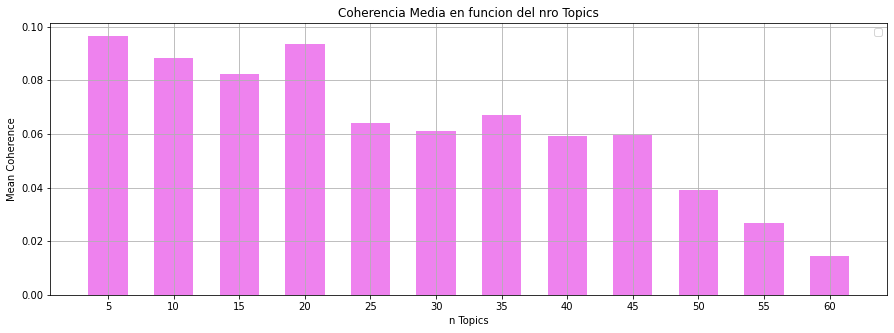

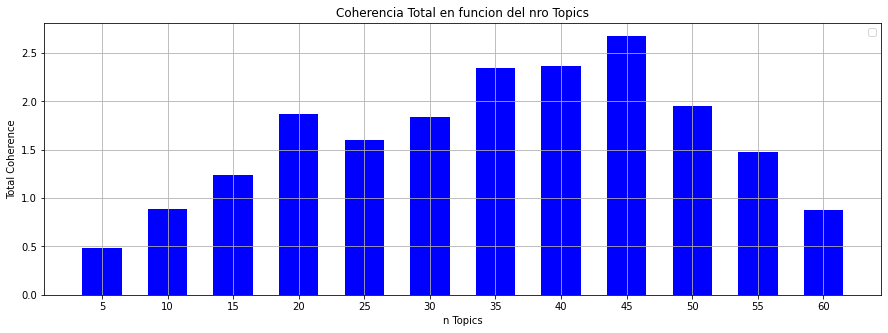

In [ ]:
Tipo_Grafico = "barras"  ###INGRESE TIPO DE GRAFICO: "barras" o "lineas"

#fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
#plt.subplots(1, 2)

#plt.figure(figsize=[10,4])
for i in range(0,2):
  plt.figure(figsize=[15,5])
  x=N_Topics_array
  if i == 1:
    y=Coherence_Total_array
    title_="Coherencia Total en funcion del nro Topics"
    lable_y="Total Coherence"
    color_="b"
  elif i == 0:
    y=Coherence_Media_array
    title_="Coherencia Media en funcion del nro Topics"
    lable_y="Mean Coherence"
    color_="violet"

  values = N_Topics_array 

  if Tipo_Grafico == "barras":
    plt.bar(x,y, color=color_, width=3)
  elif Tipo_Grafico == "lineas": 
    plt.plot(x,y, color=color_, linewidth=3, marker="o")

  #plt.plot(pd.DataFrame(Coherence_Total_array, index=N_Topics_array), label='Coherence Total', color="b", linewidth=2)
  plt.title(title_)
  plt.xlabel("n Topics")
  plt.ylabel(lable_y)
  plt.legend()
  plt.xticks(x,values)
  plt.grid()
  plt.show()
  print(" ")


In [ ]:
################# GRID SEARCH ###############################
#### ANALIZADOR DE CANTIDAD OPTIMA DE TOPICOS, POR COMPARACION DE COHERENCIAS TOTALES Y PROMEDIO:
#### SOLO LO HAREMOS CON EL MODELO LDA CON BOW VECTOR, DADO QUE RESULTO MEJOR Q EL LSI Y EL TD-IDF:
Cant_Topics_Min = 2   # INGRESE CANTIDAD MINIMA DE TOPICOS
Cant_Topics_Max = 60  # INGRESE CANTIDAD MAXIMA DE TOPICOS
Step = 1              # INGRESE STEP

window_size_=10     # INGRESE COHERENCIA WINDOW_SIZE 
coherence_='c_npmi' # INGRESE METRICA DE COHERENCIA 
topn_=30            # INGRESE COHERENCIA TOP WORDS TO EVALUATE. 
Grid_Search = range(Cant_Topics_Min, Cant_Topics_Max + Step, Step)  


#fig, axes = plt.subplots(1, 3, figsize=(35, 15), sharex=True)
Max_Coherence_Total = 0
Max_Topic_Total = 0
Max_Coherence_Media = 0
Max_Topic_Media = 0
Coherence_Total_array = []
Coherence_Media_array = []
N_Topics_array = []
Models_array = []
Topics_Models_array = []
for n_topics in Grid_Search:
  semilla = 420
  ldamodel = LdaModel(corpus=corpus, num_topics=n_topics, id2word=dictionary, iterations = 200, passes=10
                    # , random_seed = semilla
                     )
  ldatopics = [[word for word, prob in topic] for topicid, topic in ldamodel.show_topics(n_topics,formatted=False)]
  
  lda_coherence = CoherenceModel(topics=ldatopics, texts=texts, dictionary=dictionary, window_size=window_size_,coherence=coherence_,topn=topn_).get_coherence_per_topic()
  
  df_lda = pd.DataFrame([range(n_topics),lda_coherence,ldatopics],index=['topic_id','coherence','topic']).transpose()
  
  Coherence_Total_array.append(sum(lda_coherence))
  Coherence_Media_array.append(np.mean(lda_coherence))
  N_Topics_array.append(n_topics)
  Models_array.append(ldamodel)
  Topics_Models_array.append(ldatopics)

  if sum(lda_coherence) > Max_Coherence_Total:
    Max_Coherence_Total = sum(lda_coherence)
    Max_Topic_Total = n_topics

  if np.mean(lda_coherence) > Max_Coherence_Media:
    Max_Coherence_Media = np.mean(lda_coherence)
    Max_Topic_Media = n_topics 
    
  #plt.suptitle('Total Coherence: ' + str(round(sum(lda_coherence),2))
  #title = "Coherence - n Topics: " + str(nro_topics)
  ##title = "Coherence - n Topics: " + str(n_topics)
  #fig, ax = plt.subplots(figsize = (2.5, 4))
  #fig, axes = plt.subplots(2, 5, figsize=(35, 15), sharex=True)
  ##pd.Series({'LDA':sum(lda_coherence),}).plot.bar(title=title, ylim=(0,2.0), color=["blue"])
  print(" ")
  print('n Topics: %.2f ' % (n_topics))
  print('LDA Mean Coherence: %.2f ' % (round(np.mean(lda_coherence),2)))
  print('LDA Total Coherence: %.2f ' % (round(sum(lda_coherence),2)))

print("--------------------------------------------------------------- ")
print(" ")
print("Final Results:")
print(" ")
#print('Max Coherence Total: %.2f ' % (Max_Coherence))
#print('N Topics Total Optimo: %.2f ' % (Max_Topic))
print('Max Coherence Total: %.2f ' % (Max_Coherence_Total))
print('N Topics Total Optimo: %.2f ' % (Max_Topic_Total))
print(" ")
print('Max Coherence Media: %.2f ' % (Max_Coherence_Media))
print('N Topics Media Optimo: %.2f ' % (Max_Topic_Media))
print("--------------------------------------------------------------- ")

"""
n Topics: 5.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.52 
 
n Topics: 6.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.57 
 
n Topics: 7.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.72 
 
n Topics: 8.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.78 
 
n Topics: 9.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 0.84 
 
n Topics: 10.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 0.93 
 
n Topics: 11.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 0.89 
 
n Topics: 12.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 1.11 
 
n Topics: 13.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 1.26 
 
n Topics: 14.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 0.77 
 
n Topics: 15.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 1.26 
 
n Topics: 16.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 1.33 
 
n Topics: 17.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 1.55 
 
n Topics: 18.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 1.68 
 
n Topics: 19.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 1.87 
 
n Topics: 20.00 
LDA Mean Coherence: 0.07 
LDA Total Coherence: 1.32 
 
n Topics: 21.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.18 
 
n Topics: 22.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 1.79 
 
n Topics: 23.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 1.04 
 
n Topics: 24.00 
LDA Mean Coherence: 0.07 
LDA Total Coherence: 1.65 
 
n Topics: 25.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 2.15 
 
n Topics: 26.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 2.38 
 
n Topics: 27.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 2.05 
 
n Topics: 28.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.54 
 
n Topics: 29.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.85 
 
n Topics: 30.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.77 
 
n Topics: 31.00 
LDA Mean Coherence: 0.07 
LDA Total Coherence: 2.14 
 
n Topics: 32.00 
LDA Mean Coherence: 0.07 
LDA Total Coherence: 2.33 
 
n Topics: 33.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 1.84 
 
n Topics: 34.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 1.58 
 
n Topics: 35.00 
LDA Mean Coherence: 0.03 
LDA Total Coherence: 0.94 
 
n Topics: 36.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.05 
 
n Topics: 37.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.38 
 
n Topics: 38.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 1.69 
 
n Topics: 39.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 1.76 
 
n Topics: 40.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 1.58 
 
n Topics: 41.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 2.08 
 
n Topics: 42.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.53 
 
n Topics: 43.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 2.23 
 
n Topics: 44.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.61 
 
n Topics: 45.00 
LDA Mean Coherence: 0.03 
LDA Total Coherence: 1.40 
 
n Topics: 46.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 1.98 
 
n Topics: 47.00 
LDA Mean Coherence: 0.06 
LDA Total Coherence: 2.59 
 
n Topics: 48.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 2.13 
 
n Topics: 49.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 1.73 
 
n Topics: 50.00 
LDA Mean Coherence: 0.03 
LDA Total Coherence: 1.48 
 
n Topics: 51.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 2.52 
 
n Topics: 52.00 
LDA Mean Coherence: 0.03 
LDA Total Coherence: 1.64 
 
n Topics: 53.00 
LDA Mean Coherence: 0.04 
LDA Total Coherence: 2.04 
"""

 
n Topics: 2.00 
LDA Mean Coherence: 0.18 
LDA Total Coherence: 0.37 
 
n Topics: 3.00 
LDA Mean Coherence: 0.13 
LDA Total Coherence: 0.40 
 
n Topics: 4.00 
LDA Mean Coherence: 0.12 
LDA Total Coherence: 0.46 
 
n Topics: 5.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.52 
 
n Topics: 6.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.57 
 
n Topics: 7.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.72 
 
n Topics: 8.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 0.78 
 
n Topics: 9.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 0.84 
 
n Topics: 10.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 0.93 
 
n Topics: 11.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 0.89 
 
n Topics: 12.00 
LDA Mean Coherence: 0.09 
LDA Total Coherence: 1.11 
 
n Topics: 13.00 
LDA Mean Coherence: 0.10 
LDA Total Coherence: 1.26 
 
n Topics: 14.00 
LDA Mean Coherence: 0.05 
LDA Total Coherence: 0.77 
 
n Topics: 15.00 
LDA Mean Coherence: 0.08 
LDA Total Coherence: 1.26 


In [ ]:
#### TRAIGO A MANO LOS RESULTADOS, PARA GRAFICAR, PORQUE SE CAYO EL COLAB ANTES DE TERMINAR:
N_Topics_array = pd.read_excel("n_Topics.xlsx")
N_Topics_array.head()
N_Topics_array = N_Topics_array["n_Topics"].tolist()

Coherence_Total_array = pd.read_excel("LDA_Total_Coherence.xlsx")
Coherence_Total_array.head()
Coherence_Total_array = Coherence_Total_array["LDA Total Coherence"].tolist()

Coherence_Media_array = pd.read_excel("LDA_Mean_Coherence.xlsx")
Coherence_Media_array.head()
Coherence_Media_array = Coherence_Media_array["LDA Mean Coherence"].tolist()

print(type(N_Topics_array))
print(len(N_Topics_array))
print(type(Coherence_Total_array))
print(len(Coherence_Total_array))
print(type(Coherence_Media_array))
print(len(Coherence_Media_array))

<class 'list'>
49
<class 'list'>
49
<class 'list'>
49


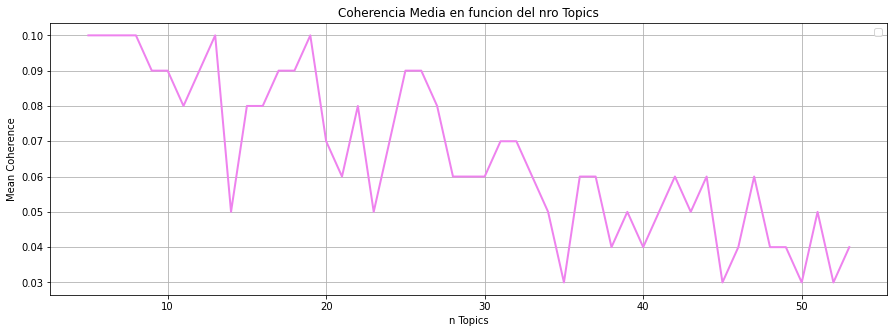

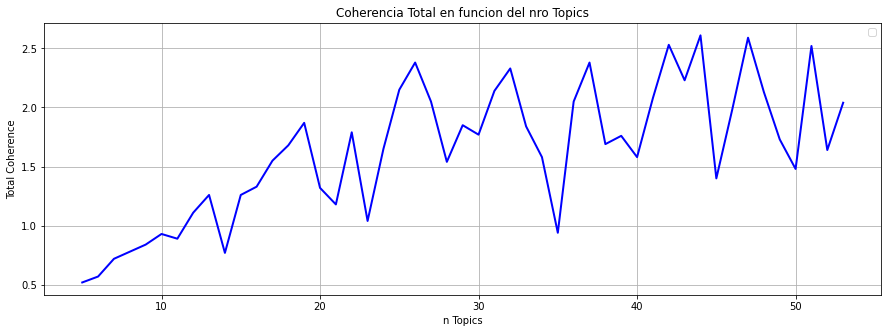

In [ ]:
Tipo_Grafico = "lineas"  ###INGRESE TIPO DE GRAFICO: "barras" o "lineas"

#fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
#plt.subplots(1, 2)

#plt.figure(figsize=[10,4])
for i in range(0,2):
  plt.figure(figsize=[15,5])
  x=N_Topics_array
  if i == 1:
    y=Coherence_Total_array
    title_="Coherencia Total en funcion del nro Topics"
    lable_y="Total Coherence"
    color_="b"
  elif i == 0:
    y=Coherence_Media_array
    title_="Coherencia Media en funcion del nro Topics"
    lable_y="Mean Coherence"
    color_="violet"

  #values = N_Topics_array 

  if Tipo_Grafico == "barras":
    plt.bar(x,y, color=color_, width=0.5)
  elif Tipo_Grafico == "lineas": 
    plt.plot(x,y, color=color_, linewidth=2)

  #plt.plot(pd.DataFrame(Coherence_Total_array, index=N_Topics_array), label='Coherence Total', color="b", linewidth=2)
  plt.title(title_)
  plt.xlabel("n Topics")
  plt.ylabel(lable_y)
  plt.legend()
  #plt.xticks(x,values)
  plt.grid()
  plt.show()
  print(" ")


###***Resultados preliminares del análisis de la cant. óptima de tópicos:***

Nótese, como tanto para la coherencia media como para la total, **se observan picos máximos en alrededor de 19 topics y en 26 topics.** En principio, aplicando un criterio similar al que se aplica para la métrica de Silhouette en la optimización de clusters, **podríamos elegir como las cantidades de tópicos candidatas a ser las óptimas a la de 19 tópicos y a la de 26 tópicos.**

Sin embargo, **un análisis más profundo y de carácter cualitativo será necesario** para confirmar o refutar a estas cantidades óptimas. En este sentido, **proseguiremos con los siguientes pasos:**

***1) Analizaremos la cantidad de “tópicos basura” existentes en cada caso.***

***2) Realizaremos un análisis cualitativo (y subjetivo) del contenido semántico de las top 30 words de cada tópico contenido en dichos casos, antes de tomar una decisión.***

***3) En caso de que los dos análisis anteriores resultaran negativos, volveremos a escoger una cantidad de tópicos candidata a ser óptima de entre los restantetes picos máximos de coherencia media y total, y repetiremos pasos 1) a 3).***


In [ ]:
"""Nótese, como tanto para la coherencia media como para la total, se observan picos máximos en alrededor de 19 topics y en 26 topics. En principio, aplicando un criterio similar al que se aplica para la métrica de Silhouette en la optimización de clusters, podríamos elegir como las cantidades de tópicos candidatas a ser las óptimas a la de 19 tópicos y a la de 26 tópicos. 
   Sin embargo, un análisis más profundo y de carácter cualitativo será necesario para confirmar o refutar a estas cantidades óptimas. En este sentido, proseguiremos con los siguientes pasos: 
    1) Analizaremos la cantidad de “tópicos basura” existentes en cada caso. 
    2) Realizaremos un análisis cualitativo (y subjetivo) del contenido semántico de las top 30 words de cada tópico contenido en dichos casos, antes de tomar una decisión.
    3) En caso de que los dos análisis anteriores resultaran negativos, volveremos a escoger una cantidad de tópicos candidata a ser óptima de entre los restantetes picos máximos de coherencia media y total, y repetiremos pasos 1) a 3).
"""






In [ ]:
###### ACA INTENTO GRAFICAR LOS TOPICS COMO HACE EL SKLEARN PERO PARA GENSIM, SIN EXITO AUN: XXXX

cant_topics = 10 #### INGRESE CANTIDAD TOPICS

import math
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.decomposition import NMF, MiniBatchNMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = cant_topics
n_top_words = 30
batch_size = 128
init = "nndsvda"

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(math.ceil(cant_topics/5), 5, figsize=(35, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

tf_vectorizer = count_vect

tf_feature_names = tf_vectorizer.get_feature_names_out()

plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")


In [ ]:
print('Max Coherence Total: %.2f ' % (Max_Coherence))
print('N Topics Total Optimo: %.2f ' % (Max_Topic))
print(" ")


Max Coherence Total: 2.65 
N Topics Total Optimo: 40.00 
 


In [ ]:
Max_Coherence

2.646271142888884

NameError: ignored

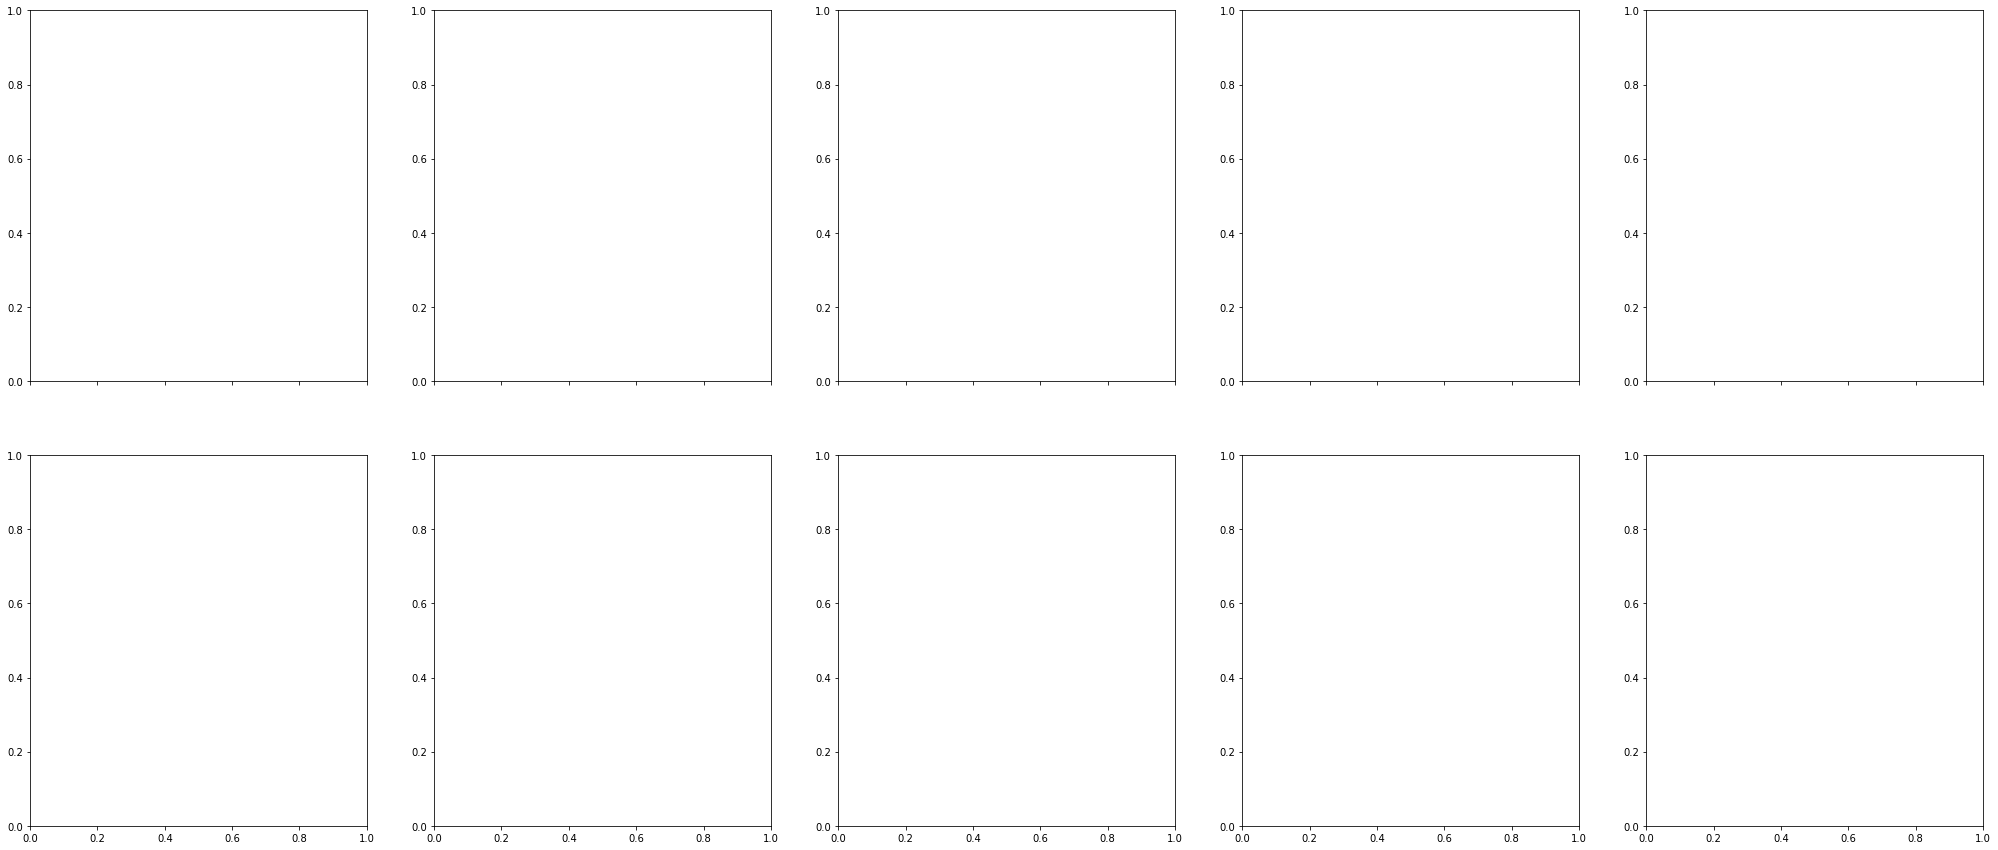

In [ ]:
n_topics = 2
title = "Coherence - n Topics: " + str(n_topics)
  #fig, ax = plt.subplots(figsize = (2.5, 4))
fig, axes = plt.subplots(2, 5, figsize=(35, 15), sharex=True)
pd.Series({'LDA':sum(lda_coherence),}).plot.bar(title=title, ylim=(0,2.0), color=["blue"])
print('n Topics: %.2f ' % (n_topics))
print('LDA Mean Coherence: %.2f ' % (round(np.mean(lda_coherence),2)))
print('LDA Total Coherence: %.2f ' % (round(sum(lda_coherence),2)))

In [ ]:
df_lda.sort_values(by='coherence',ascending=False)

,topic_id,coherence,topic
5,5,0.555076,"[de, des, la, les, et, un, le, une, nous, en]"
1,1,0.257901,"[translation, machine, system, mt, systems, la..."
2,2,0.198918,"[semantic, parsing, syntactic, annotation, dep..."
6,6,0.158358,"[sentiment, social, analysis, news, detection,..."
7,7,0.085927,"[models, model, data, training, language, perf..."
8,8,0.080812,"[verbs, linguistic, verb, et, lexical, bias, s..."
0,0,0.052261,"[word, languages, words, language, paper, lexi..."
9,9,0.05089,"[model, information, knowledge, question, prop..."
4,4,0.026575,"[task, system, features, paper, model, results..."
3,3,0.02495,"[language, corpus, data, paper, research, syst..."


In [ ]:
df_tf_idf.sort_values(by='coherence',ascending=False)

,topic_id,coherence,topic
4,4,0.568605,"[de, des, la, les, un, le, une, nous, et, en]"
6,6,0.254704,"[translation, mt, system, machine, systems, ev..."
0,0,0.231611,"[social, news, media, sentiment, analysis, fea..."
9,9,0.227263,"[dialogue, dialog, conversation, user, convers..."
3,3,0.155374,"[task, subtask, shared, system, tweets, emotio..."
2,2,0.042644,"[model, models, word, tasks, learning, knowled..."
8,8,-0.161693,"[nan, annotation, corpus, resources, lexical, ..."
1,1,-0.363209,"[ud, afips, hpsg, attachment, amharic, ashingt..."
5,5,-0.400593,"[privacy, hyperpartisan, tl, gender, bridging,..."
7,7,-0.428394,"[gec, bibliography, urdu, poetry, attacks, att..."
